# Problem Statement
The Bank Indessa has not done well in the last 3 quarters. Their NPAs (Non Performing Assets)
have reached all time high. It is starting to lose the confidence of its investors. As a result, it’s stock
has fallen by 20% in the previous quarter alone.
After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With
the messy data collected over all the years, this bank has decided to use machine learning to figure
out a way to find these defaulters and devise a plan to reduce them.
This bank uses a pool of investors to sanction their loans. For example: If any customer has applied
for a loan of $20000, along with the bank, the investors perform due diligence on the requested loan
application. Keep this in mind while understanding data.
In this challenge, you will help this bank by predicting the probability that a member will default.

# BY
 ### Himadri Goswami

## IMPORTING PACKAGES

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import roc_auc_score

## LOAD DATA

In [2]:
df = pd.read_csv('train_indessa.csv')
df.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
5,10247268,15000,15000,14950.0,36 months,BAT2575549,8.90,A,A5,Design Consultant,...,0.0,NaN,INDIVIDUAL,NaN,113th week,0.0,0.0,350619.0,29500.0,0
6,8089625,5000,5000,4975.0,36 months,,7.90,A,A4,TOYOTA OF NORTH HOLLYWOOD,...,0.0,NaN,INDIVIDUAL,NaN,117th week,0.0,1023.0,13272.0,55500.0,1
7,23043116,6000,6000,6000.0,36 months,NaN,9.17,B,B1,Banker,...,0.0,54.0,INDIVIDUAL,NaN,78th week,0.0,0.0,272579.0,11800.0,0
8,45900933,6000,6000,6000.0,36 months,BAT4136152,13.99,C,C4,LVN,...,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,281521.0,62100.0,0
9,41272507,34550,34550,34550.0,60 months,BAT4694572,17.14,D,D4,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,52th week,0.0,0.0,76034.0,33200.0,0


In [3]:
# Class Label : Binary Classification
train_target = pd.DataFrame(df['loan_status'])

In [4]:
df.shape #size of dataset

(532428, 45)

In [5]:
df['loan_status'].value_counts() #status of loan amount, 1 = Defaulter, 0 = Non Defaulters

0    406601
1    125827
Name: loan_status, dtype: int64

In [6]:
df['loan_status']

0         0
1         0
2         0
3         0
4         0
         ..
532423    0
532424    0
532425    1
532426    0
532427    0
Name: loan_status, Length: 532428, dtype: int64

In [7]:
df.columns #all columns


Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

## Data Preprocessing

### Term Feature

In [8]:
# Replaces months string with '' 
df['term'].replace(to_replace=' months', value='', regex=True, inplace=True) 

# Convert it to numeric
df['term'] = pd.to_numeric(df['term'], errors='coerce')

In [9]:
df.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
5,10247268,15000,15000,14950.0,36,BAT2575549,8.90,A,A5,Design Consultant,...,0.0,NaN,INDIVIDUAL,NaN,113th week,0.0,0.0,350619.0,29500.0,0
6,8089625,5000,5000,4975.0,36,,7.90,A,A4,TOYOTA OF NORTH HOLLYWOOD,...,0.0,NaN,INDIVIDUAL,NaN,117th week,0.0,1023.0,13272.0,55500.0,1
7,23043116,6000,6000,6000.0,36,NaN,9.17,B,B1,Banker,...,0.0,54.0,INDIVIDUAL,NaN,78th week,0.0,0.0,272579.0,11800.0,0
8,45900933,6000,6000,6000.0,36,BAT4136152,13.99,C,C4,LVN,...,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,281521.0,62100.0,0
9,41272507,34550,34550,34550.0,60,BAT4694572,17.14,D,D4,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,52th week,0.0,0.0,76034.0,33200.0,0


In [10]:
df['term'].value_counts()

36    372793
60    159635
Name: term, dtype: int64

In [11]:
df.iloc[:,1:15]

,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan
0,14350,14350,14350.0,36,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n
1,4800,4800,4800.0,36,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n
2,10000,10000,10000.0,36,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n
3,15000,15000,15000.0,36,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n
4,16000,16000,16000.0,36,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,20000,20000,20000.0,36,,12.49,B,B5,Registered Nurse,10+ years,MORTGAGE,75000.0,Source Verified,n
532424,12000,12000,12000.0,60,BAT2003848,14.99,C,C5,Account Mgr,10+ years,MORTGAGE,59000.0,Not Verified,n
532425,18725,18725,18725.0,60,NaN,20.80,E,E1,Comcast cable,8 years,RENT,42504.0,Verified,n
532426,21000,21000,21000.0,60,BAT3193689,16.29,D,D2,Resident Physician,1 year,RENT,50000.0,Source Verified,n


###  Employment Length Feature

In [12]:
df['emp_length'].replace('n/a', '0', inplace=True)
df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

# Convert it to numeric
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')


In [13]:
df.iloc[:,1:15]

,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan
0,14350,14350,14350.0,36,,19.19,E,E3,clerk,9.0,OWN,28700.0,Source Verified,n
1,4800,4800,4800.0,36,BAT1586599,10.99,B,B4,Human Resources Specialist,0.0,MORTGAGE,65000.0,Source Verified,n
2,10000,10000,10000.0,36,BAT1586599,7.26,A,A4,Driver,2.0,OWN,45000.0,Not Verified,n
3,15000,15000,15000.0,36,BAT4808022,19.72,D,D5,Us office of Personnel Management,10.0,RENT,105000.0,Not Verified,n
4,16000,16000,16000.0,36,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10.0,RENT,52000.0,Verified,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,20000,20000,20000.0,36,,12.49,B,B5,Registered Nurse,10.0,MORTGAGE,75000.0,Source Verified,n
532424,12000,12000,12000.0,60,BAT2003848,14.99,C,C5,Account Mgr,10.0,MORTGAGE,59000.0,Not Verified,n
532425,18725,18725,18725.0,60,NaN,20.80,E,E1,Comcast cable,8.0,RENT,42504.0,Verified,n
532426,21000,21000,21000.0,60,BAT3193689,16.29,D,D2,Resident Physician,1.0,RENT,50000.0,Source Verified,n


In [14]:
df['emp_length'].value_counts() #unique emp_length value calculation

10.0    175105
2.0      47276
0.0      42253
3.0      42175
1.0      34202
5.0      33393
4.0      31581
7.0      26680
8.0      26443
6.0      25741
9.0      20688
Name: emp_length, dtype: int64

### Sub Grade Feature

In [15]:
df['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True) 

# Convert it to numeric
df['sub_grade'] = pd.to_numeric(df['sub_grade'], errors='coerce')

In [16]:
df.iloc[:,1:15]

,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan
0,14350,14350,14350.0,36,,19.19,E,43,clerk,9.0,OWN,28700.0,Source Verified,n
1,4800,4800,4800.0,36,BAT1586599,10.99,B,14,Human Resources Specialist,0.0,MORTGAGE,65000.0,Source Verified,n
2,10000,10000,10000.0,36,BAT1586599,7.26,A,4,Driver,2.0,OWN,45000.0,Not Verified,n
3,15000,15000,15000.0,36,BAT4808022,19.72,D,35,Us office of Personnel Management,10.0,RENT,105000.0,Not Verified,n
4,16000,16000,16000.0,36,BAT2833642,10.64,B,12,LAUSD-HOLLYWOOD HIGH SCHOOL,10.0,RENT,52000.0,Verified,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,20000,20000,20000.0,36,,12.49,B,15,Registered Nurse,10.0,MORTGAGE,75000.0,Source Verified,n
532424,12000,12000,12000.0,60,BAT2003848,14.99,C,25,Account Mgr,10.0,MORTGAGE,59000.0,Not Verified,n
532425,18725,18725,18725.0,60,NaN,20.80,E,41,Comcast cable,8.0,RENT,42504.0,Verified,n
532426,21000,21000,21000.0,60,BAT3193689,16.29,D,32,Resident Physician,1.0,RENT,50000.0,Source Verified,n


In [17]:
df['sub_grade'].value_counts()  #unique sub_grade value calculation

13    33844
14    33198
21    31975
22    31356
23    30080
12    29390
15    29313
24    29103
5     27016
11    26968
25    24985
31    21712
4     20823
32    17991
33    15771
34    15226
3     14082
1     13653
2     13533
35    12867
41    10928
42    10255
43     8488
44     7051
45     5773
51     4350
52     3196
53     2708
54     2056
55     1516
61     1112
62      824
63      559
64      391
65      335
Name: sub_grade, dtype: int64

In [18]:
df.iloc[:,-10:-1]

,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0
1,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0
2,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0
3,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0
4,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0
...,...,...,...,...,...,...,...,...,...
532423,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0
532424,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0
532425,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0
532426,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0


### Last Week Pay Feature

In [19]:
df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)

df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

# Convert it to numeric
df['last_week_pay'] = pd.to_numeric(df['last_week_pay'], errors='coerce')

In [20]:
df.iloc[:,-10:-1]

,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0.0,74.0,INDIVIDUAL,NaN,26.0,0.0,0.0,28699.0,30800.0
1,0.0,NaN,INDIVIDUAL,NaN,9.0,0.0,0.0,9974.0,32900.0
2,0.0,NaN,INDIVIDUAL,NaN,9.0,0.0,65.0,38295.0,34900.0
3,0.0,NaN,INDIVIDUAL,NaN,135.0,0.0,0.0,55564.0,24700.0
4,0.0,NaN,INDIVIDUAL,NaN,96.0,0.0,0.0,47159.0,47033.0
...,...,...,...,...,...,...,...,...,...
532423,0.0,NaN,INDIVIDUAL,NaN,65.0,0.0,0.0,83087.0,24800.0
532424,0.0,NaN,INDIVIDUAL,NaN,70.0,0.0,0.0,227812.0,17800.0
532425,0.0,NaN,INDIVIDUAL,NaN,9.0,0.0,0.0,26010.0,24200.0
532426,0.0,NaN,INDIVIDUAL,NaN,78.0,0.0,0.0,29197.0,23300.0


## Handling Missing Values

In [21]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [22]:
columns = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade',
           'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
           'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 
           'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in columns:
    df[col].fillna(df[col].median(), inplace=True)  # Filling NaN values with median of each column present in columns.
    print('Imputation with Median: %s' % (col))

  
num_cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in num_cols:
    df[col].fillna(0, inplace=True)        ## Filling NaN values with 0 for each column present in columns.
    print('Imputation with Zero: %s' % (col))

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med


In [23]:
df[['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade',
           'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
           'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 
           'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']]

,term,loan_amnt,funded_amnt,last_week_pay,int_rate,sub_grade,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,total_rec_int,mths_since_last_major_derog,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_length
0,36,14350,14350,26.0,19.19,43,28700.0,33.88,50.0,75.0,14.0,22515.0,73.1,28.0,1173.84,74.0,0.0,28699.0,30800.0,9.0
1,36,4800,4800,9.0,10.99,14,65000.0,3.64,31.0,70.0,6.0,7624.0,23.2,13.0,83.95,44.0,0.0,9974.0,32900.0,0.0
2,36,10000,10000,9.0,7.26,4,45000.0,18.42,31.0,70.0,5.0,10877.0,31.2,19.0,56.47,44.0,65.0,38295.0,34900.0,2.0
3,36,15000,15000,135.0,19.72,35,105000.0,14.97,46.0,70.0,10.0,13712.0,55.5,21.0,4858.62,44.0,0.0,55564.0,24700.0,10.0
4,36,16000,16000,96.0,10.64,12,52000.0,20.16,31.0,70.0,11.0,35835.0,76.2,27.0,2296.41,44.0,0.0,47159.0,47033.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,36,20000,20000,65.0,12.49,15,75000.0,14.53,31.0,51.0,12.0,15775.0,63.6,34.0,2595.45,44.0,0.0,83087.0,24800.0,10.0
532424,60,12000,12000,70.0,14.99,25,59000.0,22.97,31.0,81.0,10.0,9453.0,53.1,29.0,2182.92,44.0,0.0,227812.0,17800.0,10.0
532425,60,18725,18725,9.0,20.80,41,42504.0,27.27,26.0,70.0,14.0,12085.0,49.9,26.0,645.32,44.0,0.0,26010.0,24200.0,8.0
532426,60,21000,21000,78.0,16.29,32,50000.0,14.91,31.0,70.0,7.0,20902.0,89.7,14.0,4619.79,44.0,0.0,29197.0,23300.0,1.0


In [24]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
pub_rec     

## Feature Engineering

In [25]:
#copy the original data frame
final_df = df.copy()
final_df = final_df.drop(['loan_status'], axis=1)

In [26]:
#insert new features
import math

# How big the loan a person has taken with respect to his earnings, annual income to fund by bank ratio
final_df['income_to_loan'] = np.round_(final_df['annual_inc']/final_df['funded_amnt'], decimals = 2)

# How big the loan a person has taken with respect to his earnings, annual income to fund by investors ratio
final_df['income_to_loan_inv'] = np.round_(final_df['annual_inc']/final_df['funded_amnt_inv'], decimals = 2)


# Interest paid so far = interest received till date + Late fee received till date
final_df['total_int_paid'] = final_df['total_rec_int'] + final_df['total_rec_late_fee']

# Calculating EMIs (monthly)
#EMI = [P x R x (1+R)^N] / [(1+R)^N-1]
principal = final_df['loan_amnt']
rate = final_df['int_rate'] /(100*12)
time = final_df['term']

final_df['emi_per_month'] = np.round_((principal * rate * (1+rate)**time)/((1+rate)**(time)-1), decimals = 2)

# Calculating EMIs paid (in terms of percent) np.round_(in_array, decimals = 2)
final_df['emi_paid_perc'] = np.round_(((final_df['last_week_pay'])/(final_df['term']/12*52+1))*100, decimals = 2)

In [27]:
final_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,income_to_loan,income_to_loan_inv,total_int_paid,emi_per_month,emi_paid_perc
0,58189336,14350,14350,14350.0,36,,19.19,E,43,clerk,...,26.0,0.0,0.0,28699.0,30800.0,2.00,2.00,1173.84,527.39,16.56
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,14,Human Resources Specialist,...,9.0,0.0,0.0,9974.0,32900.0,13.54,13.54,83.95,157.12,5.73
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,4,Driver,...,9.0,0.0,65.0,38295.0,34900.0,4.50,4.50,56.47,309.96,5.73
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,35,Us office of Personnel Management,...,135.0,0.0,0.0,55564.0,24700.0,7.00,7.00,4858.62,555.32,85.99
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,12,LAUSD-HOLLYWOOD HIGH SCHOOL,...,96.0,0.0,0.0,47159.0,47033.0,3.25,3.25,2296.41,521.10,61.15


In [28]:
final_df.shape

(532428, 49)

In [29]:

cols = ['batch_enrolled',  'verification_status_joint', 'verification_status','delinq_2yrs','inq_last_6mths','pub_rec',
        'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type']

for col in cols:
    final_df[col].fillna('00', inplace=True)

In [30]:
final_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,income_to_loan,income_to_loan_inv,total_int_paid,emi_per_month,emi_paid_perc
0,58189336,14350,14350,14350.0,36,,19.19,E,43,clerk,...,26.0,0.0,0.0,28699.0,30800.0,2.00,2.00,1173.84,527.39,16.56
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,14,Human Resources Specialist,...,9.0,0.0,0.0,9974.0,32900.0,13.54,13.54,83.95,157.12,5.73
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,4,Driver,...,9.0,0.0,65.0,38295.0,34900.0,4.50,4.50,56.47,309.96,5.73
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,35,Us office of Personnel Management,...,135.0,0.0,0.0,55564.0,24700.0,7.00,7.00,4858.62,555.32,85.99
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,12,LAUSD-HOLLYWOOD HIGH SCHOOL,...,96.0,0.0,0.0,47159.0,47033.0,3.25,3.25,2296.41,521.10,61.15


In [31]:
final_df.isnull().sum()

member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
batch_enrolled                     0
int_rate                           0
grade                              0
sub_grade                          0
emp_title                      30833
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
pymnt_plan                         0
desc                               0
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq             0
mths_since_last_record             0
open_acc                           0
pub_rec                            0
r

In [32]:
final_df['grade']

0         E
1         B
2         A
3         D
4         B
         ..
532423    B
532424    C
532425    E
532426    D
532427    A
Name: grade, Length: 532428, dtype: object

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

x_tfidf = v.fit_transform(final_df['grade'])   # Create a feature matrix using TFIDF.

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names())

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([final_df, df_tfidf], axis=1)

# Finally, we drop the 'grade' feature as we have a more dimensional feature matrix.
res_train.drop('grade',axis=1,inplace=True)

print(res_train.shape)

(532428, 6)
(532428, 54)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['verification_status'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'verification_status' feature as we have a more dimensional feature matrix.
res_train.drop('verification_status',axis=1,inplace=True)

print(res_train.shape)

(532428, 3)
(532428, 56)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['verification_status_joint'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'verification_status_joint' feature as we have a more dimensional feature matrix.
res_train.drop('verification_status_joint',axis=1,inplace=True)

print(res_train.shape)

(532428, 4)
(532428, 59)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['pymnt_plan'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'pymnt_plan' feature as we have a more dimensional feature matrix.
res_train.drop('pymnt_plan',axis=1,inplace=True)

print(res_train.shape)

(532428, 2)
(532428, 60)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['addr_state'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'addr_state' feature as we have a more dimensional feature matrix.
res_train.drop('addr_state',axis=1,inplace=True)

print(res_train.shape)

(532428, 46)
(532428, 105)


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['initial_list_status'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'initial_list_status' feature as we have a more dimensional feature matrix.
res_train.drop('initial_list_status',axis=1,inplace=True) 

print(res_train.shape)

(532428, 2)
(532428, 106)


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['application_type'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'application_type' feature as we have a more dimensional feature matrix.
res_train.drop('application_type',axis=1,inplace=True) 

print(res_train.shape)

(532428, 2)
(532428, 107)


In [40]:
#finally dropped unwanted columns
res_train.drop(['desc', 'zip_code', 'emp_title', 'title' ,'batch_enrolled','home_ownership'], axis=1, inplace=True)

In [41]:
res_train.drop(['purpose'], axis=1, inplace=True)

In [42]:
res_train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,...,va,vt,wa,wi,wv,wy,f,w,individual,joint
0,58189336,14350,14350,14350.0,36,19.19,43,9.0,28700.0,33.88,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,70011223,4800,4800,4800.0,36,10.99,14,0.0,65000.0,3.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,70255675,10000,10000,10000.0,36,7.26,4,2.0,45000.0,18.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1893936,15000,15000,15000.0,36,19.72,35,10.0,105000.0,14.97,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,7652106,16000,16000,16000.0,36,10.64,12,10.0,52000.0,20.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [43]:
res_train.shape

(532428, 100)

In [44]:
res_train.dtypes

member_id            int64
loan_amnt            int64
funded_amnt          int64
funded_amnt_inv    float64
term                 int64
                    ...   
wy                 float64
f                  float64
w                  float64
individual         float64
joint              float64
Length: 100, dtype: object

In [45]:
#scale data frame
def scaler():
    result = res_train.copy()
    for feature_name in res_train.columns:
        max_value = res_train[feature_name].max()
        min_value = res_train[feature_name].min()
        result[feature_name] = (res_train[feature_name] - min_value) / (max_value - min_value)
    return result

In [46]:
res_train_scaled = scaler()

TypeError: '>=' not supported between instances of 'float' and 'str'

In [47]:
res_train.iloc[:,45]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
532423    0.0
532424    0.0
532425    0.0
532426    0.0
532427    0.0
Name: source, Length: 532428, dtype: float64

## Train-Test Split
split our data in training and cross-validation sets.

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(res_train), np.array(train_target), test_size=0.30)

In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((372699, 100), (372699, 1), (159729, 100), (159729, 1))

## XGBoost Classifier

In [50]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=1, n_estimators=50, max_depth=4)
xg.fit(X_train, y_train)


# evaluate predictions
y_train_predict_xg = xg.predict(X_train)
print("==========================")
print('Train Accuracy %.3f' % metrics.accuracy_score(y_train, y_train_predict_xg))

# make predictions for test data
y_pred_xg = xg.predict(X_test)
predictions = [round(value) for value in y_pred_xg]

accuracy_per_roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))


print('Test Accuracy %.3f' % metrics.accuracy_score(y_test, predictions))
print("==========================")
print(metrics.confusion_matrix(y_test, predictions))
print("==========================")
print(metrics.classification_report(y_test, predictions))
print("==========================")
print('Precision Score %.3f' % metrics.precision_score(y_test, predictions))
print('Recall Score %.3f' % metrics.recall_score(y_test, predictions))
print('F1 Score %.3f' % metrics.f1_score(y_test, predictions))

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy 0.932
ROC-AUC: 89.5431369150%
Test Accuracy 0.931
[[117435   4488]
 [  6515  31291]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96    121923
           1       0.87      0.83      0.85     37806

    accuracy                           0.93    159729
   macro avg       0.91      0.90      0.90    159729
weighted avg       0.93      0.93      0.93    159729

Precision Score 0.875
Recall Score 0.828
F1 Score 0.850


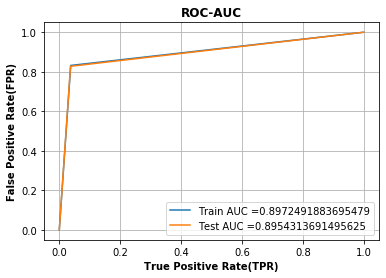

In [51]:
y_train_pred = xg.predict(X_train)    
y_test_pred = xg.predict(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)", fontweight='bold')
plt.ylabel("False Positive Rate(FPR)", fontweight='bold')
plt.title("ROC-AUC", fontweight='bold')
plt.grid()
plt.show()